### Nguyen Thai Anh - st122910- Assignment 2

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
np.__version__, torch.__version__

('1.21.5', '1.13.0+cu117')

In [3]:
import matplotlib
matplotlib.__version__

'3.5.1'

Constraint: Only use our code (not other code....)

1. I guess you already try a bigger corpus
2. I guess you already try window size 2
3. I guess you already have skipgram, skipgram(neg), cbow, glove

Do this:
1. Compare them based on syntactic accuracy and semantic accuracy, similar to how is done in https://nlp.stanford.edu/pubs/glove.pdf (see Table 2) - NO NEED to try 1000 or 300 embed size.....I just want you to learn how to do experiment.....
2. Try to find a correlation with just ONE similarity dataset (which humans judge how similar is two words.....)

## Skipgram, CBOW, Negative skipgrams 

## Data 

In [4]:
#specify the sentences / corpus
#corpus is defined as a set of documents
#document is basically a bunch of sentence(s)
corpus = [
    'he is a king',
    'he is a teacher',
    'she is a queen',
    'he is a man',
    'he is a professor',
    'she is a girl',
    'she is very beautiful',
    'I am very good',
    'I am a pressident',
    'he is a boy',
    'she is a woman',
    'Thailand has many temples',
    'yellow pagoda',
    'There are many temples in Thailand',
    'Vietnam has many pagodas',
    'Vietnam has many delicious dishes',
    'Data Science and AI Rise in the World',
    'Vietnam and Thailand are developing very fast in AI and Data Science',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
    'The capital of Vietnam is Hanoi',
    'The capital of Thailand is Bangkok',
    'NLP is too difficult',
    'ML is too easy',
    'CP is too difficult',
    'Learning to ride a motorbike is easy',
    'Learning to drive a car is easy',
    'Math is too difficult',
    'Linear is too easy',
    'DMM is too difficult',
    'I love you',
    'I hate you',
    'Spring is so warm',
    'winter is so cold',
    'I am so handsome'
    'Life is short. Don’t be lazy',
    'You are the biggest person when you have a kindness',
    'No one is old for fairytales',
    'Life is the greatest journey you will be ever on',
    'Some of the best thing in life are mistakes',
    'Everbody is reactionary on subjects they understand',
    'Life begins when you step out of your comfort zone',
    'Once you choose the hope, anything is possible',
    'Life is really simple, but we insist on making it complicated',
    'Love is starts with a smile, grows with a kiss and ends with a tear',
    'Life is not fair, get used to it',
    'Keep your face to the sunshine and you can not see a shadow',
    'Where there is love, there is life',
    'Be your dream, now or never ',
    'Stars can’t shine without darkness',
    'The healthy equals beautiful',
    'You may delay, but time will not',
    'You cannot heal the world until you heal yourself',
    'Because he will find an easy way to do it',
    'In life you have a choice: Bitter or Better? Choose better, foreget bitter',
    'Do not pray for an easy life, pray for the strength to endure a difficult one',
    'When somebody challenges you, fight back.Be brutal, be tough',
    'Change will not come if we wait for some other person or some other time. We are the ones we’ve been waiting for. We are the change that we seek',
    'Change is never easy, but always possible',
]

In [5]:
#1. tokenize
#usually you use spaCy / NLTK to tokenize (but we gonna do this later on, we gonna have spaCy)
corpus_tokenized = [sent.split(" ") for sent in corpus]
corpus_tokenized  #we called each of this as "tokens", NOT words

[['he', 'is', 'a', 'king'],
 ['he', 'is', 'a', 'teacher'],
 ['she', 'is', 'a', 'queen'],
 ['he', 'is', 'a', 'man'],
 ['he', 'is', 'a', 'professor'],
 ['she', 'is', 'a', 'girl'],
 ['she', 'is', 'very', 'beautiful'],
 ['I', 'am', 'very', 'good'],
 ['I', 'am', 'a', 'pressident'],
 ['he', 'is', 'a', 'boy'],
 ['she', 'is', 'a', 'woman'],
 ['Thailand', 'has', 'many', 'temples'],
 ['yellow', 'pagoda'],
 ['There', 'are', 'many', 'temples', 'in', 'Thailand'],
 ['Vietnam', 'has', 'many', 'pagodas'],
 ['Vietnam', 'has', 'many', 'delicious', 'dishes'],
 ['Data', 'Science', 'and', 'AI', 'Rise', 'in', 'the', 'World'],
 ['Vietnam',
  'and',
  'Thailand',
  'are',
  'developing',
  'very',
  'fast',
  'in',
  'AI',
  'and',
  'Data',
  'Science'],
 ['warsaw', 'is', 'poland', 'capital'],
 ['berlin', 'is', 'germany', 'capital'],
 ['paris', 'is', 'france', 'capital'],
 ['The', 'capital', 'of', 'Vietnam', 'is', 'Hanoi'],
 ['The', 'capital', 'of', 'Thailand', 'is', 'Bangkok'],
 ['NLP', 'is', 'too', 'diffic

In [6]:
#2. numericalize

#2.1 get all the unique words
#we want to flatten this (basically merge all list)
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized)))  #vocabs is a term defining all unique words your system know

In [7]:
#2.2 assign id to all these vocabs
word2index = {v: idx for idx, v in enumerate(vocabs)}

In [8]:
word2index['AI']

40

In [9]:
vocabs.append('<UNK>') #chaky, can it be ##UNK, or UNKKKKKK, or anything
word2index['<UNK>'] = len(vocabs) -1  #usually <UNK> is 0

In [10]:
index2word = {v:k for k, v in word2index.items()}

index2word

{0: '',
 1: 'beautiful',
 2: 'with',
 3: 'ride',
 4: 'girl',
 5: 'bitter',
 6: 'an',
 7: 'good',
 8: 'hope,',
 9: 'comfort',
 10: 'ever',
 11: 'so',
 12: 'without',
 13: 'world',
 14: 'we’ve',
 15: 'hate',
 16: 'thing',
 17: 'tough',
 18: 'dream,',
 19: 'very',
 20: 'ones',
 21: 'biggest',
 22: 'man',
 23: 'easy',
 24: 'and',
 25: 'sunshine',
 26: 'may',
 27: 'love,',
 28: 'been',
 29: 'smile,',
 30: 'fairytales',
 31: 'Do',
 32: 'has',
 33: 'there',
 34: 'handsomeLife',
 35: 'I',
 36: 'delicious',
 37: 'foreget',
 38: 'one',
 39: 'until',
 40: 'AI',
 41: 'subjects',
 42: 'for',
 43: 'a',
 44: 'get',
 45: 'fair,',
 46: 'pray',
 47: 'on',
 48: 'find',
 49: 'Spring',
 50: 'Bangkok',
 51: 'Because',
 52: 'are',
 53: 'anything',
 54: 'CP',
 55: 'pagoda',
 56: 'When',
 57: 'Science',
 58: 'Change',
 59: 'motorbike',
 60: 'Keep',
 61: 'lazy',
 62: 'france',
 63: 'understand',
 64: 'making',
 65: 'Linear',
 66: 'warsaw',
 67: 'am',
 68: 'will',
 69: 'when',
 70: 'Don’t',
 71: 'never',
 72: 'S

In [11]:
vocabs

['',
 'beautiful',
 'with',
 'ride',
 'girl',
 'bitter',
 'an',
 'good',
 'hope,',
 'comfort',
 'ever',
 'so',
 'without',
 'world',
 'we’ve',
 'hate',
 'thing',
 'tough',
 'dream,',
 'very',
 'ones',
 'biggest',
 'man',
 'easy',
 'and',
 'sunshine',
 'may',
 'love,',
 'been',
 'smile,',
 'fairytales',
 'Do',
 'has',
 'there',
 'handsomeLife',
 'I',
 'delicious',
 'foreget',
 'one',
 'until',
 'AI',
 'subjects',
 'for',
 'a',
 'get',
 'fair,',
 'pray',
 'on',
 'find',
 'Spring',
 'Bangkok',
 'Because',
 'are',
 'anything',
 'CP',
 'pagoda',
 'When',
 'Science',
 'Change',
 'motorbike',
 'Keep',
 'lazy',
 'france',
 'understand',
 'making',
 'Linear',
 'warsaw',
 'am',
 'will',
 'when',
 'Don’t',
 'never',
 'Some',
 'winter',
 'equals',
 'time',
 'change',
 'we',
 'choose',
 'back.Be',
 'darkness',
 'insist',
 'berlin',
 'he',
 'complicated',
 'face',
 'simple,',
 'brutal,',
 'temples',
 'Hanoi',
 'Vietnam',
 'to',
 'out',
 'old',
 'they',
 'boy',
 'shine',
 'not',
 'choice:',
 'pagodas

### Prepare to train data

In [12]:
#move along the corpus
#to fit with our corpus, we gonna use window_size = 1
skipgrams = []

#for each corpus
for sent in corpus_tokenized:
    #for each sent ["apple", "banana", "fruit"]
    for i in range(1, len(sent) - 1): #start from 1 to second last
        center_word = sent[i]
        outside_words = [sent[i-1], sent[i+1]]  #window_size = 1
        for o in outside_words:
            skipgrams.append([center_word, o])
skipgrams
        
#here we want to create (banana, apple), (banana, fruit) append to some list

[['is', 'he'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'king'],
 ['is', 'he'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'teacher'],
 ['is', 'she'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'queen'],
 ['is', 'he'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'man'],
 ['is', 'he'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'professor'],
 ['is', 'she'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'girl'],
 ['is', 'she'],
 ['is', 'very'],
 ['very', 'is'],
 ['very', 'beautiful'],
 ['am', 'I'],
 ['am', 'very'],
 ['very', 'am'],
 ['very', 'good'],
 ['am', 'I'],
 ['am', 'a'],
 ['a', 'am'],
 ['a', 'pressident'],
 ['is', 'he'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'boy'],
 ['is', 'she'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'woman'],
 ['has', 'Thailand'],
 ['has', 'many'],
 ['many', 'has'],
 ['many', 'temples'],
 ['are', 'There'],
 ['are', 'many'],
 ['many', 'are'],
 ['many', 'temples'],
 ['temples', 'many'],
 ['temples', 'in'],
 ['in', 'temples'],
 ['in', 'Thailand'],
 ['has', 'Vietnam'],
 ['has', 'many'],
 ['many', 'has'],
 ['many', 'pago

In [13]:
def random_batch(batch_size, corpus):
    
    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent ["Vietnam", "Thailand", "of"]
        for i in range(1, len(sent) - 1): #start from 1 to second last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-1]], word2index[sent[i+1]]]  #window_size = 1
            for o in outside_words:
                skipgrams.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [14]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[161],
       [154],
       [190],
       [154],
       [ 67],
       [110],
       [ 71],
       [ 52],
       [  5],
       [ 91]])


In [15]:
voc_size = len(vocabs)
voc_size

212

In [16]:
vocabs

['',
 'beautiful',
 'with',
 'ride',
 'girl',
 'bitter',
 'an',
 'good',
 'hope,',
 'comfort',
 'ever',
 'so',
 'without',
 'world',
 'we’ve',
 'hate',
 'thing',
 'tough',
 'dream,',
 'very',
 'ones',
 'biggest',
 'man',
 'easy',
 'and',
 'sunshine',
 'may',
 'love,',
 'been',
 'smile,',
 'fairytales',
 'Do',
 'has',
 'there',
 'handsomeLife',
 'I',
 'delicious',
 'foreget',
 'one',
 'until',
 'AI',
 'subjects',
 'for',
 'a',
 'get',
 'fair,',
 'pray',
 'on',
 'find',
 'Spring',
 'Bangkok',
 'Because',
 'are',
 'anything',
 'CP',
 'pagoda',
 'When',
 'Science',
 'Change',
 'motorbike',
 'Keep',
 'lazy',
 'france',
 'understand',
 'making',
 'Linear',
 'warsaw',
 'am',
 'will',
 'when',
 'Don’t',
 'never',
 'Some',
 'winter',
 'equals',
 'time',
 'change',
 'we',
 'choose',
 'back.Be',
 'darkness',
 'insist',
 'berlin',
 'he',
 'complicated',
 'face',
 'simple,',
 'brutal,',
 'temples',
 'Hanoi',
 'Vietnam',
 'to',
 'out',
 'old',
 'they',
 'boy',
 'shine',
 'not',
 'choice:',
 'pagodas

### Module

In [17]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [18]:
batch_size = 2

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 212])

In [19]:
voc_size

212

In [20]:
input, label = random_batch(batch_size, corpus_tokenized)
input

array([[175],
       [ 19]])

In [21]:
label #context word

array([[190],
       [  7]])

In [22]:
emb_size = 2 #usually, this can be 50, 100, or 300
model = Skipgram(voc_size, emb_size)

In [23]:
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)  #LongTensor basically means integer....

In [24]:
torch.LongTensor(2)

tensor([140141938895664, 140141938859888])

In [25]:
torch.LongTensor([2]) 

tensor([2])

In [26]:
input_tensor.shape

torch.Size([2, 1])

In [27]:
label_tensor.shape

torch.Size([2, 1])

In [28]:
all_vocabs

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

In [29]:
loss = model(input_tensor, label_tensor, all_vocabs)

In [30]:
loss

tensor(5.8454, grad_fn=<NegBackward0>)

In [31]:
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
model      = Skipgram(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [32]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

### Training module

In [33]:
import time
num_epochs = 5000
start = time.time()
#for epoch
for epoch in range(num_epochs):
    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    end =time.time()
    epoch_mins, epoch_secs = epoch_time(start, end)
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch : {epoch+1} | Loss : {loss:.6f} | Time : {epoch_mins}m {epoch_secs}s')

Epoch : 1000 | Loss : 6.373128 | Time : 0m 3s
Epoch : 2000 | Loss : 3.137424 | Time : 0m 8s
Epoch : 3000 | Loss : 5.002718 | Time : 0m 10s
Epoch : 4000 | Loss : 7.704853 | Time : 0m 13s
Epoch : 5000 | Loss : 4.761683 | Time : 0m 16s


In [34]:

vocabs

['',
 'beautiful',
 'with',
 'ride',
 'girl',
 'bitter',
 'an',
 'good',
 'hope,',
 'comfort',
 'ever',
 'so',
 'without',
 'world',
 'we’ve',
 'hate',
 'thing',
 'tough',
 'dream,',
 'very',
 'ones',
 'biggest',
 'man',
 'easy',
 'and',
 'sunshine',
 'may',
 'love,',
 'been',
 'smile,',
 'fairytales',
 'Do',
 'has',
 'there',
 'handsomeLife',
 'I',
 'delicious',
 'foreget',
 'one',
 'until',
 'AI',
 'subjects',
 'for',
 'a',
 'get',
 'fair,',
 'pray',
 'on',
 'find',
 'Spring',
 'Bangkok',
 'Because',
 'are',
 'anything',
 'CP',
 'pagoda',
 'When',
 'Science',
 'Change',
 'motorbike',
 'Keep',
 'lazy',
 'france',
 'understand',
 'making',
 'Linear',
 'warsaw',
 'am',
 'will',
 'when',
 'Don’t',
 'never',
 'Some',
 'winter',
 'equals',
 'time',
 'change',
 'we',
 'choose',
 'back.Be',
 'darkness',
 'insist',
 'berlin',
 'he',
 'complicated',
 'face',
 'simple,',
 'brutal,',
 'temples',
 'Hanoi',
 'Vietnam',
 'to',
 'out',
 'old',
 'they',
 'boy',
 'shine',
 'not',
 'choice:',
 'pagodas

In [35]:
he = torch.LongTensor([word2index['he']])
he

tensor([83])

In [36]:
he_center_embed = model.embedding_center_word(he)
he_outisde_embed = model.embedding_outside_word(he)

he_embed = (he_center_embed + he_outisde_embed) / 2
he_embed

tensor([[0.7861, 0.3905]], grad_fn=<DivBackward0>)

In [37]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

In [38]:
#find embedding of fruit, cat
print(get_embed('she'))
print(get_embed('king'))
print(get_embed('women'))

(-0.017786502838134766, -0.36487337946891785)
(1.6561168432235718, 0.9548915028572083)
(1.8547391891479492, 1.7263727188110352)


### Plot

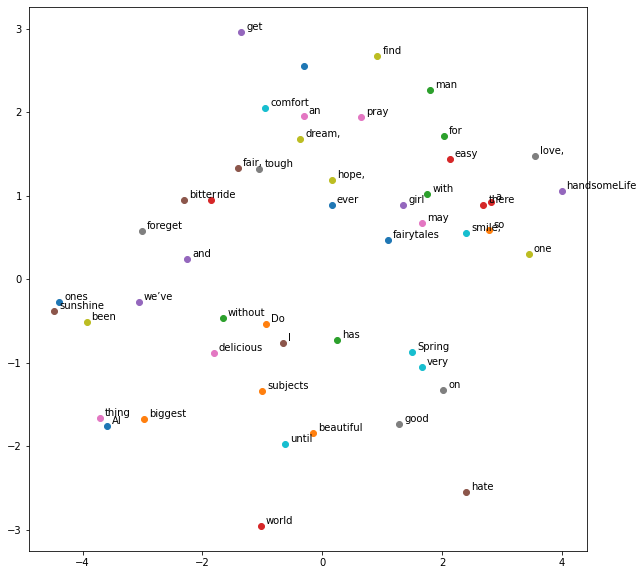

In [39]:
plt.figure(figsize=(10,10))
for i, word in enumerate(vocabs[:50]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

In [40]:
#let's make what we have made into a function (batch function)
#return a batches of data, e.g., =2 --> ['banana', 'apple'], ['banana', 'fruit']
#also i want these batches to be id, NOT token   --> [5, 4]
def random_batch(batch_size, corpus,window_size=1):
    skipgrams = []
    #for each corpus
    for sent in corpus_tokenized:
        for i in range(window_size, len(sent) - window_size):
            center_word = word2index[sent[i]]
            for z in range(window_size):
                outside_words = [word2index[sent[i-1-z]], word2index[sent[i+1+z]]] #Let it slide 2 from 1 time, every 2 from it encodes into 1 float
                #print(outside_words)
                for o in outside_words:
                    skipgrams.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [41]:
input, label = random_batch(10,corpus_tokenized,2)
print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[184],
       [ 97],
       [ 44],
       [ 91],
       [114],
       [147],
       [ 48],
       [203],
       [ 64],
       [179]])


### Module

In [42]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [43]:
batch_size = 2

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 212])

In [44]:
voc_size

212

In [45]:
input, label = random_batch(batch_size, corpus_tokenized)
input

array([[ 14],
       [188]])

In [46]:
label #context word

array([[ 20],
       [197]])

In [47]:
emb_size = 2 #usually, this can be 50, 100, or 300
model = Skipgram(voc_size, emb_size)

In [48]:
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)  #LongTensor basically means integer....

In [49]:
torch.LongTensor(2)

tensor([     94392103932480, 4646817161521976425])

In [50]:
input_tensor.shape

torch.Size([2, 1])

In [51]:
label_tensor.shape

torch.Size([2, 1])

In [52]:
all_vocabs

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

In [53]:
loss = model(input_tensor, label_tensor, all_vocabs)

In [54]:
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
model      = Skipgram(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

### Train module

In [55]:
import time
num_epochs = 5000
starttime = time.time()
#for epoch
for epoch in range(num_epochs):
    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    endtime =time.time()
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | time: {(endtime - starttime)}")

Epoch 1000 | Loss: 4.868678 | time: 25.872106075286865
Epoch 2000 | Loss: 5.152846 | time: 28.16067123413086
Epoch 3000 | Loss: 2.755406 | time: 30.380014181137085
Epoch 4000 | Loss: 8.212277 | time: 32.45869159698486
Epoch 5000 | Loss: 2.491813 | time: 34.26653742790222


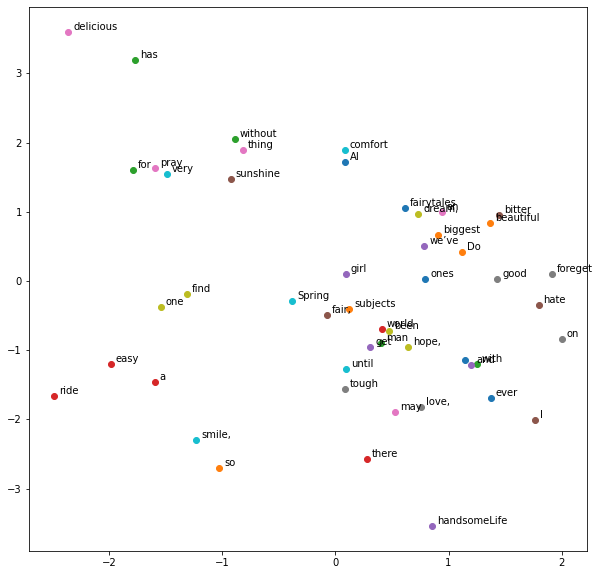

In [56]:
plt.figure(figsize=(10,10))
for i, word in enumerate(vocabs[:50]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## CBOW 

In [57]:
#let's make what we have made into a function (batch function)
def random_batch(batch_size, corpus):
    cbows = []
    #for each corpus
    for sent in corpus_tokenized:
        for i in range(1, len(sent) - 1): #start from 1 to second last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-1]], word2index[sent[i+1]]]  #window_size = 1
            for j in outside_words:
                cbows.append([outside_words,center_word])
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(cbows)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([cbows[index][1]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([cbows[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)
    

In [58]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[156],
       [ 91],
       [149],
       [159],
       [122],
       [ 88],
       [147],
       [  9],
       [207],
       [199]])


### Module

In [59]:
class CBOW(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(CBOW, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [60]:
batch_size = 2

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 212])

In [61]:
voc_size

212

In [62]:
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
model      = CBOW(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [63]:
import time
num_epochs = 5000
start = time.time()
#for epoch
for epoch in range(num_epochs):
    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    end =time.time()
    epoch_mins, epoch_secs = epoch_time(start, end)
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch : {epoch+1} | Loss : {loss:.6f} | Time : {epoch_mins}m {epoch_secs}s')

Epoch : 1000 | Loss : 3.935853 | Time : 0m 7s
Epoch : 2000 | Loss : 2.584126 | Time : 0m 12s
Epoch : 3000 | Loss : 3.634122 | Time : 0m 14s
Epoch : 4000 | Loss : 2.985457 | Time : 0m 16s
Epoch : 5000 | Loss : 1.169755 | Time : 0m 18s


### Plot

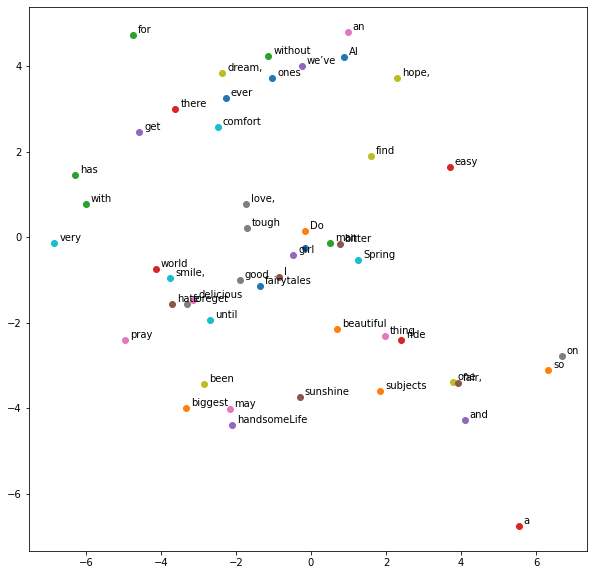

In [64]:
plt.figure(figsize=(10,10))
for i, word in enumerate(vocabs[:50]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## negative skipgrams 

In [65]:
#let's make what we have made into a function (batch function)
#return a batches of data, e.g., =2 --> ['banana', 'apple'], ['banana', 'fruit']
#also i want these batches to be id, NOT token   --> [5, 4]

def random_batch(batch_size, corpus):
    
    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        for i in range(1, len(sent) - 1): #start from 1 to second last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-1]], word2index[sent[i+1]]]  #window_size = 1
            for o in outside_words:
                skipgrams.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)
    

In [66]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[185],
       [163],
       [149],
       [203],
       [ 91],
       [ 60],
       [159],
       [175],
       [157],
       [ 43]])


## Unigram distribution

$$P(w)=U(w)^{3/4}/Z$$

Defining the probability of sampling negative words

In [67]:
z = 0.001  #scaling up low frequency terms

In [68]:
#count all the occurrences of vocabs
from collections import Counter

word_count = Counter(flatten(corpus_tokenized))
word_count

Counter({'he': 6,
         'is': 35,
         'a': 18,
         'king': 1,
         'teacher': 1,
         'she': 4,
         'queen': 1,
         'man': 1,
         'professor': 1,
         'girl': 1,
         'very': 3,
         'beautiful': 2,
         'I': 5,
         'am': 3,
         'good': 1,
         'pressident': 1,
         'boy': 1,
         'woman': 1,
         'Thailand': 4,
         'has': 3,
         'many': 4,
         'temples': 2,
         'yellow': 1,
         'pagoda': 1,
         'There': 1,
         'are': 6,
         'in': 4,
         'Vietnam': 4,
         'pagodas': 1,
         'delicious': 1,
         'dishes': 1,
         'Data': 2,
         'Science': 2,
         'and': 5,
         'AI': 2,
         'Rise': 1,
         'the': 10,
         'World': 1,
         'developing': 1,
         'fast': 1,
         'warsaw': 1,
         'poland': 1,
         'capital': 5,
         'berlin': 1,
         'germany': 1,
         'paris': 1,
         'france': 1,
         

In [69]:
num_total_words = sum([c for w, c in word_count.items()])
num_total_words

401

In [70]:
unigram_table = []

for v in vocabs:
    uw = word_count[v]/num_total_words
    uw_alpha = uw ** 0.75
    uw_alpha_dividebyz = int(uw_alpha / z)
    # print("vocab: ", v)
    # print("distribution: ", uw_alpha_dividebyz)
    unigram_table.extend([v] * uw_alpha_dividebyz)
    
Counter(unigram_table)

Counter({'': 11,
         'beautiful': 18,
         'with': 25,
         'ride': 11,
         'girl': 11,
         'bitter': 11,
         'an': 18,
         'good': 11,
         'hope,': 11,
         'comfort': 11,
         'ever': 11,
         'so': 25,
         'without': 11,
         'world': 11,
         'we’ve': 11,
         'hate': 11,
         'thing': 11,
         'tough': 11,
         'dream,': 11,
         'very': 25,
         'ones': 11,
         'biggest': 11,
         'man': 11,
         'easy': 42,
         'and': 37,
         'sunshine': 11,
         'may': 11,
         'love,': 11,
         'been': 11,
         'smile,': 11,
         'fairytales': 11,
         'Do': 11,
         'has': 25,
         'there': 18,
         'handsomeLife': 11,
         'I': 37,
         'delicious': 11,
         'foreget': 11,
         'one': 18,
         'until': 11,
         'AI': 18,
         'subjects': 11,
         'for': 31,
         'a': 97,
         'get': 11,
         'fair,': 11,


In [71]:
word_count

Counter({'he': 6,
         'is': 35,
         'a': 18,
         'king': 1,
         'teacher': 1,
         'she': 4,
         'queen': 1,
         'man': 1,
         'professor': 1,
         'girl': 1,
         'very': 3,
         'beautiful': 2,
         'I': 5,
         'am': 3,
         'good': 1,
         'pressident': 1,
         'boy': 1,
         'woman': 1,
         'Thailand': 4,
         'has': 3,
         'many': 4,
         'temples': 2,
         'yellow': 1,
         'pagoda': 1,
         'There': 1,
         'are': 6,
         'in': 4,
         'Vietnam': 4,
         'pagodas': 1,
         'delicious': 1,
         'dishes': 1,
         'Data': 2,
         'Science': 2,
         'and': 5,
         'AI': 2,
         'Rise': 1,
         'the': 10,
         'World': 1,
         'developing': 1,
         'fast': 1,
         'warsaw': 1,
         'poland': 1,
         'capital': 5,
         'berlin': 1,
         'germany': 1,
         'paris': 1,
         'france': 1,
         

##  Negative sampling

In [72]:
def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

In [73]:
import random
#you don't want to pick samples = targets, basically negative samples
#k = number of negative samples - how many? they found 10 is the best
#will be run during training
#after random_batch, 
def negative_sampling(targets, unigram_table, k):
    #targets is already in id.....
    #but the unigram_table is in word....
    #1. get the batch size of this targets
    batch_size = targets.shape[0]
    neg_samples = []
    #2. for each batch
    for i in range(batch_size):
        #randomly pick k negative words from unigram_table
        target_index = targets[i].item()  #looping each of the batch....
        nsample = []
        while len(nsample) < k:
            neg = random.choice(unigram_table)
            #if this word == target, skip this word
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        #append this word to some list
        neg_samples.append(prepare_sequence(nsample, word2index).reshape(1, -1))  #tensor[], tensor[]
    return torch.cat(neg_samples)  #tensor[[], []]

In [74]:
batch_size = 2
input_batch, label_batch = random_batch(batch_size, corpus_tokenized)

input_batch, label_batch

(array([[29],
        [94]]),
 array([[192],
        [ 41]]))

In [75]:
input_batch = torch.LongTensor(input_batch)
label_batch = torch.LongTensor(label_batch)

In [76]:
num_neg = 5  #in the real code, we gonna use 10 (like in the paper)
neg_samples = negative_sampling(label_batch, unigram_table, num_neg)

In [77]:
neg_samples.shape

torch.Size([2, 5])

## Model

$$\mathbf{J}_{\text{neg-sample}}(\mathbf{v}_c,o,\mathbf{U})=-\log(\sigma(\mathbf{u}_o^T\mathbf{v}_c))-\sum_{k=1}^K\log(\sigma(-\mathbf{u}_k^T\mathbf{v}_c))$$

In [78]:
class SkipgramNeg(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(SkipgramNeg, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
        self.logsigmoid = nn.LogSigmoid()
        
    def forward(self, center_words, outside_words, negative_words):
        #center_words, outside_words: (batch_size, 1)
        #negative_words:  (batch_size, k)
        
        center_embed  = self.embedding_center_word(center_words)    #(batch_size, 1, emb_size)
        outside_embed = self.embedding_outside_word(outside_words)  #(batch_size, 1, emb_size)
        neg_embed     = self.embedding_outside_word(negative_words) #(batch_size, k, emb_size)
        
        uovc          =  outside_embed.bmm(center_embed.transpose(1, 2)).squeeze(2)  #(batch_size, 1)
        ukvc          = -neg_embed.bmm(center_embed.transpose(1, 2)).squeeze(2)  #(batch_size, k)
        ukvc_sum      =  torch.sum(ukvc, 1).view(-1, 1) #(batch_size, 1)
        
        loss = self.logsigmoid(uovc) + self.logsigmoid(ukvc_sum)  #(batch_size, 1) + (batch_size, 1)
                
        return -torch.mean(loss)  #scalar, loss should be scalar, to call backward()

In [79]:
input, label = random_batch(batch_size, corpus_tokenized)
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)

In [80]:
emb_size = 2 #usually, this can be 50, 100, or 300
voc_size = len(vocabs)
model = SkipgramNeg(voc_size, emb_size)

In [81]:
neg_tensor = negative_sampling(label_tensor, unigram_table, 5)

In [82]:

input_tensor.shape, label_tensor.shape#, neg_tensor.shape

(torch.Size([2, 1]), torch.Size([2, 1]))

In [83]:
#this should give one number
loss = model(input_tensor, label_tensor, neg_tensor)

In [84]:
loss

tensor(0.3408, grad_fn=<NegBackward0>)

## Training

In [85]:
voc_size   = len(vocabs)
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
model      = SkipgramNeg(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [86]:
import time
num_epochs = 5000
start = time.time()
#for epoch
for epoch in range(num_epochs):
    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    end =time.time()
    epoch_mins, epoch_secs = epoch_time(start, end)
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch : {epoch+1} | Loss : {loss:.6f} | Time : {epoch_mins}m {epoch_secs}s')

Epoch : 1000 | Loss : 0.883989 | Time : 0m 4s
Epoch : 2000 | Loss : 8.224915 | Time : 0m 12s
Epoch : 3000 | Loss : 7.583175 | Time : 0m 14s
Epoch : 4000 | Loss : 11.340884 | Time : 0m 16s
Epoch : 5000 | Loss : 7.776937 | Time : 0m 18s


In [87]:
vocabs

['',
 'beautiful',
 'with',
 'ride',
 'girl',
 'bitter',
 'an',
 'good',
 'hope,',
 'comfort',
 'ever',
 'so',
 'without',
 'world',
 'we’ve',
 'hate',
 'thing',
 'tough',
 'dream,',
 'very',
 'ones',
 'biggest',
 'man',
 'easy',
 'and',
 'sunshine',
 'may',
 'love,',
 'been',
 'smile,',
 'fairytales',
 'Do',
 'has',
 'there',
 'handsomeLife',
 'I',
 'delicious',
 'foreget',
 'one',
 'until',
 'AI',
 'subjects',
 'for',
 'a',
 'get',
 'fair,',
 'pray',
 'on',
 'find',
 'Spring',
 'Bangkok',
 'Because',
 'are',
 'anything',
 'CP',
 'pagoda',
 'When',
 'Science',
 'Change',
 'motorbike',
 'Keep',
 'lazy',
 'france',
 'understand',
 'making',
 'Linear',
 'warsaw',
 'am',
 'will',
 'when',
 'Don’t',
 'never',
 'Some',
 'winter',
 'equals',
 'time',
 'change',
 'we',
 'choose',
 'back.Be',
 'darkness',
 'insist',
 'berlin',
 'he',
 'complicated',
 'face',
 'simple,',
 'brutal,',
 'temples',
 'Hanoi',
 'Vietnam',
 'to',
 'out',
 'old',
 'they',
 'boy',
 'shine',
 'not',
 'choice:',
 'pagodas

In [88]:
math = torch.LongTensor([word2index['Math']])
math

tensor([130])

In [89]:
math_center_embed = model.embedding_center_word(math)
math_outisde_embed = model.embedding_outside_word(math)

math_embed = (he_center_embed + he_outisde_embed) / 2
math_embed

tensor([[0.7861, 0.3905]], grad_fn=<DivBackward0>)

In [90]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

In [91]:
print(get_embed('AI'))
print(get_embed('ML'))
print(get_embed('NLP'))

(2.8102269172668457, -0.12794137001037598)
(-1.9607560634613037, -1.5268440246582031)
(-0.6149780750274658, -0.9828943014144897)


## Plot

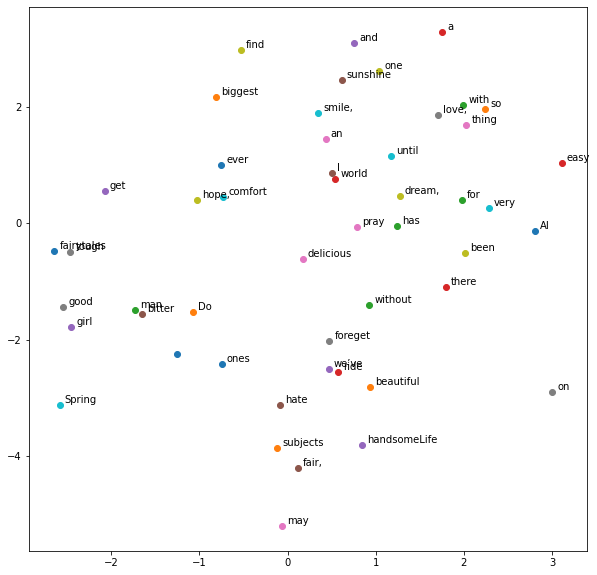

In [92]:
plt.figure(figsize=(10,10))
for i, word in enumerate(vocabs[:50]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()